In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd
import scipy.io


In [2]:
preamble, Fs = librosa.load('preamble.wav', sr=None)


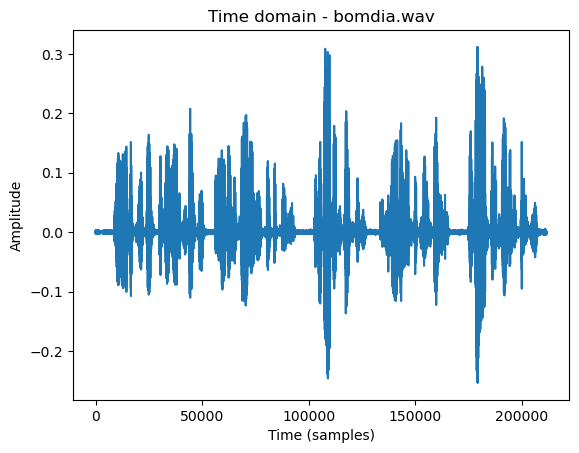

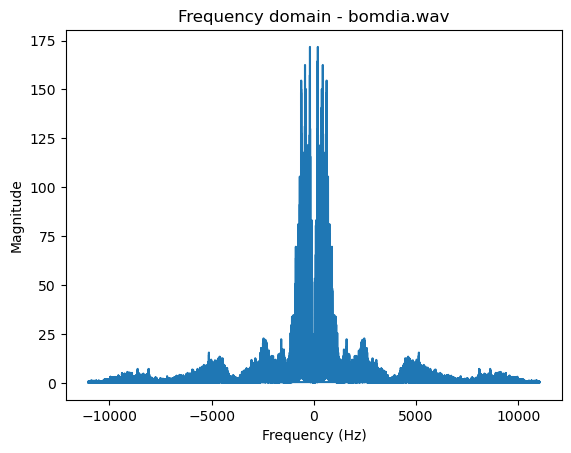

In [6]:
plt.figure()
plt.plot(preamble)
plt.title('Time domain - bomdia.wav')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

fft_preamble = np.fft.fft(preamble)
fft_freq = np.fft.fftfreq(len(fft_preamble), 1/Fs)

plt.figure()
plt.plot(fft_freq, np.abs(fft_preamble))
plt.title('Frequency domain - bomdia.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()



In [9]:
mat = scipy.io.loadmat('imp_resp.mat')
h_n = mat['h']
h_n = h_n.reshape(h_n.shape[1])

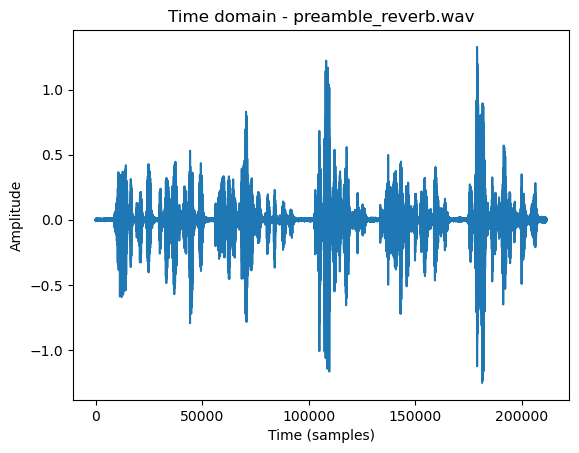

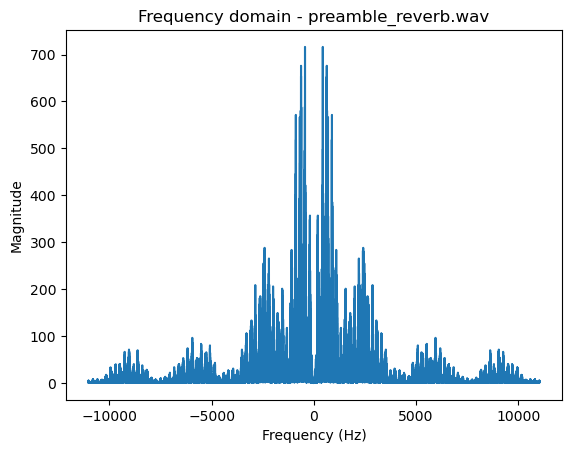

In [11]:
preamble_reverb = np.convolve(preamble, h_n, mode='same')

plt.figure()
plt.plot(preamble_reverb)
plt.title('Time domain - preamble_reverb.wav')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

fft_preamble_reverb = np.fft.fft(preamble_reverb)
fft_freq = np.fft.fftfreq(len(fft_preamble_reverb), 1/Fs)

plt.figure()
plt.plot(fft_freq, np.abs(fft_preamble_reverb))
plt.title('Frequency domain - preamble_reverb.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


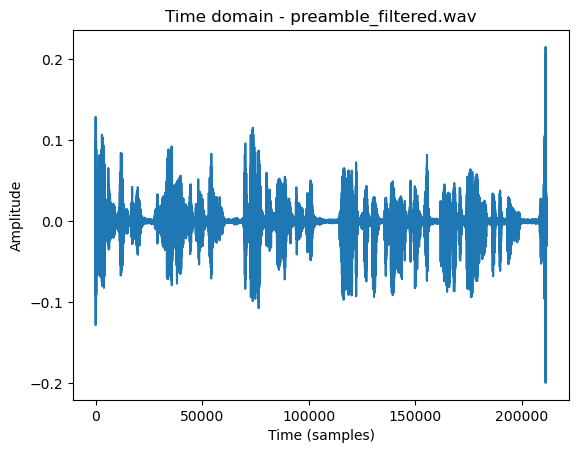

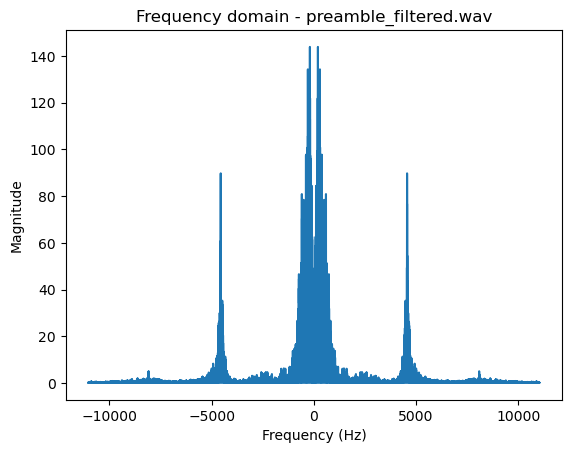

3902.5465478833416


In [15]:
#Fazendo a filtragem a partir da convolução no domínio da frequência e do inverso de h_n
H = np.fft.fft(h_n, len(preamble))
W = 1/H
w = np.fft.ifft(W)
w = np.real(w)

preamble_filtered = np.convolve(preamble, w, mode='same')

plt.figure()
plt.plot(preamble_filtered)
plt.title('Time domain - preamble_filtered.wav')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

fft_preamble_filtered = np.fft.fft(preamble_filtered)
fft_freq = np.fft.fftfreq(len(fft_preamble_filtered), 1/Fs)

plt.figure()
plt.plot(fft_freq, np.abs(fft_preamble_filtered))
plt.title('Frequency domain - preamble_filtered.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

erro = np.sum(np.abs(preamble - preamble_filtered))
print(erro)

